# Планирование рекламной кампании

**Цель исследования** - выявить закономерности успешности игр для планирования рекламной кампании интернет-магазина «Стримчик» на грядущий год.

**Этапы исследования:**
1. Обзор данных.
2. Предобработка данных.
3. Исследовательский анализ данных.
 * определение количества выпущенных игр по годам;
 * анализ продаж по платформам и по годам;
 * выявление лидирующих платформ, определение их роста и падения;
 * анализ глобальных продаж по платформам;
 * анализ влияния отзывов пользователей и критиков на продажи;
 * определение прибыльных жанров.
4. Составление портрета пользователей по регионам в зависимости от платформы и жанра.
5. Проверка гипотез:
 * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
 * Средние пользовательские рейтинги жанров Action и Sports разные.

**Описание данных**

* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию

## Обзор данных

Импортируем необходимые библиотки.

In [1]:
# Импорт стандартных библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt

pd.set_option('display.float_format', lambda x: '%.2f' % x)

Прочитаем файл с данными и проведем их обзор.

In [2]:
try:
    df = pd.read_csv('D:\\Users\\BlackEdition\\Desktop\\'
                     'Data Science\\Обучение в Яндекс\\6. Сборный проект\\games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.00,Platform,11.28,9.14,6.50,2.88,89.00,8.5,E
7,Wii Play,Wii,2006.00,Misc,13.96,9.18,2.93,2.84,58.00,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.00,Platform,14.44,6.94,4.70,2.24,87.00,8.4,E
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
# Вывод информации по столбцам
for column in df:
    display(f'Наименование столца: {column}')
    display(df[column].value_counts(dropna=True))

'Наименование столца: Name'

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: Name, Length: 11559, dtype: int64

'Наименование столца: Platform'

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

'Наименование столца: Year_of_Release'

2008.00    1427
2009.00    1426
2010.00    1255
2007.00    1197
2011.00    1136
2006.00    1006
2005.00     939
2002.00     829
2003.00     775
2004.00     762
2012.00     653
2015.00     606
2014.00     581
2013.00     544
2016.00     502
2001.00     482
1998.00     379
2000.00     350
1999.00     338
1997.00     289
1996.00     263
1995.00     219
1994.00     121
1993.00      62
1981.00      46
1992.00      43
1991.00      41
1982.00      36
1986.00      21
1989.00      17
1983.00      17
1990.00      16
1987.00      16
1988.00      15
1985.00      14
1984.00      14
1980.00       9
Name: Year_of_Release, dtype: int64

'Наименование столца: Genre'

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

'Наименование столца: NA_sales'

0.00     4508
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: NA_sales, Length: 402, dtype: int64

'Наименование столца: EU_sales'

0.00     5870
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: EU_sales, Length: 307, dtype: int64

'Наименование столца: JP_sales'

0.00    10514
0.02      741
0.01      706
0.03      546
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: JP_sales, Length: 244, dtype: int64

'Наименование столца: Other_sales'

0.00    6601
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: Other_sales, Length: 155, dtype: int64

'Наименование столца: Critic_Score'

70.00    256
71.00    254
75.00    245
78.00    240
73.00    238
        ... 
20.00      3
21.00      1
17.00      1
22.00      1
13.00      1
Name: Critic_Score, Length: 82, dtype: int64

'Наименование столца: User_Score'

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: User_Score, Length: 96, dtype: int64

'Наименование столца: Rating'

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

### Вывод

Из данных видно, что:
 * Всего в данных 16715 строк.
 * В данных имеются пропуски.
 * Колонки необходимо привести к единому стилю написания.
     * Колонку *`Year_of_Release`* необходимо привести к формату `integer`.
     * В колонках *`Critic_Score`, `User_Score`, `Rating`* имеются `NAN` значения.
     * В колонке *`User_Score`* необходимо обработать *`tbd`* значения.

## Предобработка данных

### Замена наименований столбцов

Проведем наименования столбцов датасета к нижнему регистру.

In [7]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведение к нижнему регистру выполнено успешно.

### Обработка пропусков

**Анализ характера пропусков в датасете**

Посмотрим на наличие NAN значений в датасете.

In [8]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

В колонках *`name`, `year_of_release`, `genre`, `critic_score`, `user_score`, `rating`* имеются `NAN` значения. Рассмотрим их по отдельности.

In [9]:
df.query('name != name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Видно, что в колонке *`name`* пропущены два значения игр 1993 года платформы GEN. Одна из игр продалась в Серверой америке в количестве 1.78 млн. На тот момент это, скоре всего, была очень популярная игра. Отсутствие ее названия, скорее всего, либо утеря данных, либо просто элементарный человеческий фактор.

Касательно второй игры - игра так же выпустилась в 1993 году на той же платформе, выпускалась только в Японии в количестве 0.03 млн. экземпляров. Игра малоизвестная, возможно пропуск из-за этого.

In [10]:
df.query('year_of_release != year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.00,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.00,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.00,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.00,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.00,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.00,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В части пропусков в колонке `year_of_release` видно, что пропуски есть по играм с различных платформ, жанров и т.д. Возможно эти пропуски возникли из-за сложности в установлении даты выпуска игр или данные просто не заполняли.

In [11]:
df.query('genre != genre')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.00,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.00,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в колонке genre совпадают с пропусками в колонке name. В итоге возможно об этих играх просто ничего не было известно, кроме объема реализации когда-то.

Касательно колонок `critic_score`, `user_score`, `rating` - в них имеется большое количество незаполненных значений.
Самое большое количество пропусков в колонке `critic_score` - это логично, учитывая, что свое мнение критики оставляют реже, чем, например, пользователи. Посмотрим сколько всего nan значений повторяется по всем трем столбцам.

In [12]:
df.query('critic_score ! = critic_score & user_score != user_score & rating != rating')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.00,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.00,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.00,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Как и предполагалось, строк с незаполнеными рейтингами по всем трем колонкам достаточно много. Это свидетельствует о том, что данные по данным этим играм, скорее всего, отсутствуют. Оставшиеся несколько тысяч пропусков говорят о незаполненности данных по отдельным оценкам по колонкам.

**Удаление пропусков**

Удалим пропуски в колонках *`name` и `year_of_release`*, т.к. объем пропущенных значений в них небольшой.

In [13]:
df.shape

(16715, 11)

In [14]:
df = df.dropna(subset=['name', 'year_of_release'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

In [15]:
df.shape

(16444, 11)

Удаление пропусков прошло успешно.

In [16]:
df.query('year_of_release != year_of_release')['platform'].value_counts()

Series([], Name: platform, dtype: int64)

TBD(To Be Determined) значения означают, что данные не были заполнены специально, из-за их отсутствия.

Заменим такие значения в колонке *`user_score`* на `NAN` для упрощения анализа.

In [17]:
# Замена tbd на NAN
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].isna().sum()

8981

Всего получилось 8981 `NAN` значение в колонке *`user_score`*.

Взглянем на тип колонки *`user_score`*.

In [18]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Ее тип поменялся на *`object`* после замены *`tbd`* на *`NAN`*. Поэтому необходимо будет колонку *`user_score`* привести к *`float`* значению в соответствующе разделе.

Остальные `NAN` значения предлагается оставить без изменений, т.к. их слишком большое количество, а заменить средним или медианой не предоставляется возможным из-за возможного искажения данных.

### Расчет суммарного количества продаж по регионам

Посчитаем суммарное количество продаж по регионам для дальнейшего анализа.

In [19]:
df['total_sales'] = df[['na_sales', 'eu_sales',
                        'jp_sales', 'other_sales']].sum(axis='columns')
df['total_sales']

0       82.54
1       40.24
2       35.52
3       32.77
4       31.38
         ... 
16710    0.01
16711    0.01
16712    0.01
16713    0.01
16714    0.01
Name: total_sales, Length: 16444, dtype: float64

In [20]:
df['total_sales']

0       82.54
1       40.24
2       35.52
3       32.77
4       31.38
         ... 
16710    0.01
16711    0.01
16712    0.01
16713    0.01
16714    0.01
Name: total_sales, Length: 16444, dtype: float64

### Преобразование данных

Преобразуем колонки *`user_score` и `year_of_release`* к `float` и `int` типам.

In [21]:
# Преобразование типов
df['user_score'] = df['user_score'].astype('float')
df['year_of_release'] = df['year_of_release'].astype('int64')
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
total_sales        float64
dtype: object

Остальные колонки не изменяем, т.к. там есть `NAN` значения, которые никак не заменишь.

### Проверка на дубликаты

Проверим датасет на наличие явных дубликатов.

**Проверка на явные дубликаты**

In [22]:
df.duplicated().sum()

0

In [23]:
for column in df:
    print(column, ':', df.duplicated(subset=column).sum())

name : 5018
platform : 16413
year_of_release : 16407
genre : 16432
na_sales : 16043
eu_sales : 16137
jp_sales : 16200
other_sales : 16289
critic_score : 16362
user_score : 16348
rating : 16435
total_sales : 15440


In [24]:
df.duplicated(subset=column)

0        False
1        False
2        False
3        False
4        False
         ...  
16710     True
16711     True
16712     True
16713     True
16714     True
Length: 16444, dtype: bool

Из всех дубликатов странными выглядят только дубликаты в колонке name. Однако, если поразмыслить, дубликаты скорее всего образовались из-за того, что одни и те же игры выпускались на разных платформах. Поэтому данные дубликаты я никак не буду обрабатывать. Пример ниже.

In [25]:
df.loc[df['name'] == 'Tetris']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
157,Tetris,NES,1988,Puzzle,2.97,0.69,1.81,0.11,NaN,NaN,NaN,5.58


Явные дубликаты отсутствуют.

**Проверка на неявные дубликаты**

Проверим датасет на наличие неявных дубликатов.

In [26]:
columns = ['name', 'platform', 'year_of_release', 'genre', 'rating']

# Вывод уникальных значений
for column in columns:
    print(column)
    print(df[column].sort_values().unique())

name
[' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
platform
['2600' '3DO' '3DS' 'DC' 'DS' 'GB' 'GBA' 'GC' 'GEN' 'GG' 'N64' 'NES' 'NG'
 'PC' 'PCFX' 'PS' 'PS2' 'PS3' 'PS4' 'PSP' 'PSV' 'SAT' 'SCD' 'SNES' 'TG16'
 'WS' 'Wii' 'WiiU' 'X360' 'XB' 'XOne']
year_of_release
[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016]
genre
['Action' 'Adventure' 'Fighting' 'Misc' 'Platform' 'Puzzle' 'Racing'
 'Role-Playing' 'Shooter' 'Simulation' 'Sports' 'Strategy']
rating
['AO' 'E' 'E10+' 'EC' 'K-A' 'M' 'RP' 'T' nan]


При анализе уникальных значений столбцов, где могли бы быть явные дубликаты, таковые не обнаружены.

### Вывод

В данном разделе мы проанализировали пропущенные данные, удалили ненужные пропуски, которые не влияют на анализ данных, рассчитали суммарное количество продаж по регионам. Выполнили преобразование данных и проверку данных на дубликаты.

## Исследовательский анализ данных

### Количество выпущенных игр по годам

Определим количество выпущенных по годам игр.

In [27]:
(df['year_of_release'].value_counts()
                     .reset_index()
                     .sort_values(by='index', ascending=False))

,index,year_of_release
14,2016,502
11,2015,606
12,2014,581
13,2013,544
10,2012,653
4,2011,1136
2,2010,1255
1,2009,1426
0,2008,1427
3,2007,1197


Построим сооветствующий линейный график для наглядности.

Text(0, 0.5, 'Количество выпущенных игр')

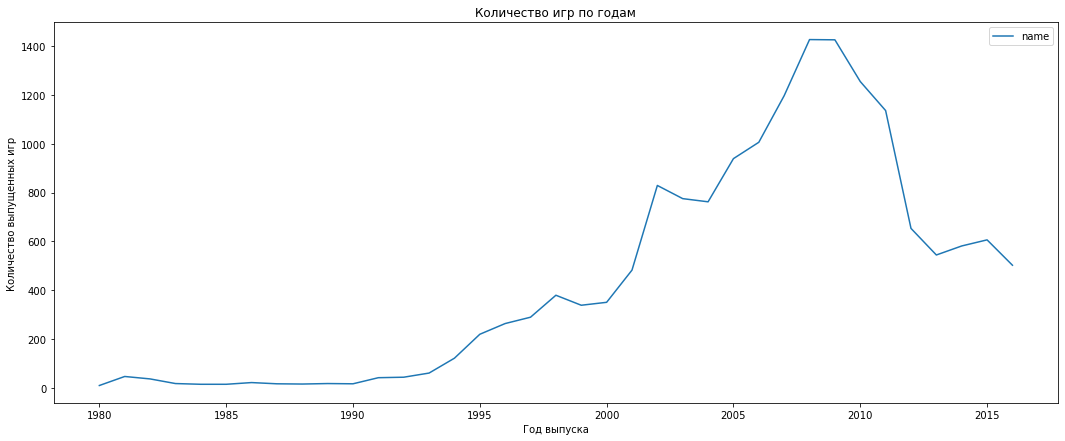

In [28]:
games_by_year = df.pivot_table(index='year_of_release',
                               values='name',
                               aggfunc='count')
plt.figure(figsize=(18, 7))
sns.lineplot(data=games_by_year)
plt.title("Количество игр по годам")
plt.xlabel("Год выпуска")
plt.ylabel("Количество выпущенных игр")

### Суммарные продажи по платформам

Посмотрим на суммарные продажи по платформам.

In [29]:
sales_by_platform = (df.pivot_table(index='platform',
                                    values='total_sales',
                                    aggfunc='sum')
                       .sort_values(by='total_sales',
                                    ascending=False))
sales_by_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Из данных видно, что по количеству продаж в мире лидируют такие платформы, как *PS2, X360, PS3, Wii, DS*.

Постоем гистограмму для визуализации данного распределения.

Text(0, 0.5, 'Количество продаж')

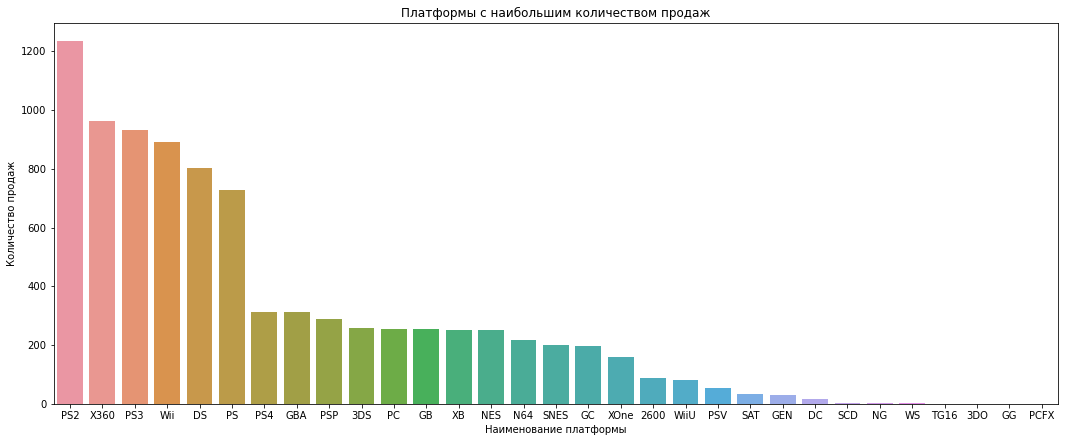

In [30]:
plt.figure(figsize=(18, 7))
sns.barplot(x=sales_by_platform.index, 
            y=sales_by_platform['total_sales'])
plt.title('Платформы с наибольшим количеством продаж')
plt.xlabel('Наименование платформы')
plt.ylabel('Количество продаж')

### Платформы с наибольшими суммарными продажами

Проанализиуем платформы с наибольшими суммарными продажами.

In [31]:
platform_sales = (df.pivot_table(index='platform',
                                 values='total_sales',
                                 aggfunc='sum')
                    .sort_values(by='total_sales',
                                 ascending=False)
                    .reset_index()
                    .loc[0:4])
platform_sales

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78


In [32]:
# Фукнция сбора данных для линейных графиков
try:
    def total_sales_by_year(platform):
        platform_sales = df.loc[(df['platform'] == platform)]
        platform_sales_by_year = (platform_sales.pivot_table(index='year_of_release',
                                                             values='total_sales',
                                                             aggfunc='sum')
                                                .sort_values('year_of_release',
                                                             ascending=False))
        return platform_sales_by_year
except:
    print('Ошибка')

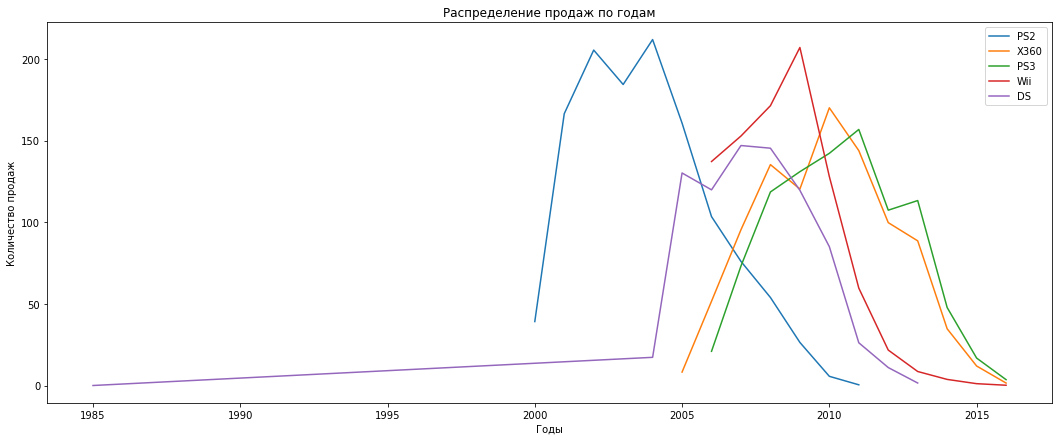

In [33]:
plt.figure(figsize=(18, 7))
plt.title('Распределение продаж по годам')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
for platform in platform_sales['platform']:
    sns.lineplot(data=total_sales_by_year(platform)
                 ['total_sales'], label=platform)
    plt.legend()

In [34]:
df.loc[(df['year_of_release'] == 1985) & (df['platform'] == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02


Из линейного графика видно, что лидерами по продажам являются платформы *PS2 и X360*. Платформы, исходят из графика, "живут" от 8 до 12 лет, после чего их сменяют либо более прибыльные платформы либо новые поколения платформ.

Т.к. минимальный срок жизни платформы около 7 лет, то предлагаю взять данные с 2014 года и пользоваться для анализа ими. Так будет ясно какие платформы к 2017 году "умирают", а какие в этот период появились и растут.

In [35]:
df_2014 = df.loc[df['year_of_release'] >= 2014]
df_2014

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Получился датасет на 1689 строк из 16715 исходного. В дальнейшем анализ будем проводить по нему.

### Лидирующие платформы

Определим платформы, которые в настоящее время лидируют на рынке, чтобы в новом году опираться на них при разработке рекламной компании.

In [36]:
platform_sales_2014 = (df_2014.pivot_table(index='platform',
                                           values='total_sales',
                                           aggfunc='sum')
                              .sort_values(by='total_sales',
                                           ascending=False)
                              .reset_index())
platform_sales_2014

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


In [37]:
# Фукнция сбора данных для линейных графиков
try:
    def total_sales_by_year_2014(platform):
        platform_sales = df_2014.loc[(df_2014['platform'] == platform)]
        platform_sales_by_year = (platform_sales.pivot_table(index='year_of_release',
                                                             values='total_sales',
                                                             aggfunc='sum')
                                                .sort_values('year_of_release',
                                                             ascending=False))
        return platform_sales_by_year
except:
    print('Ошибка')

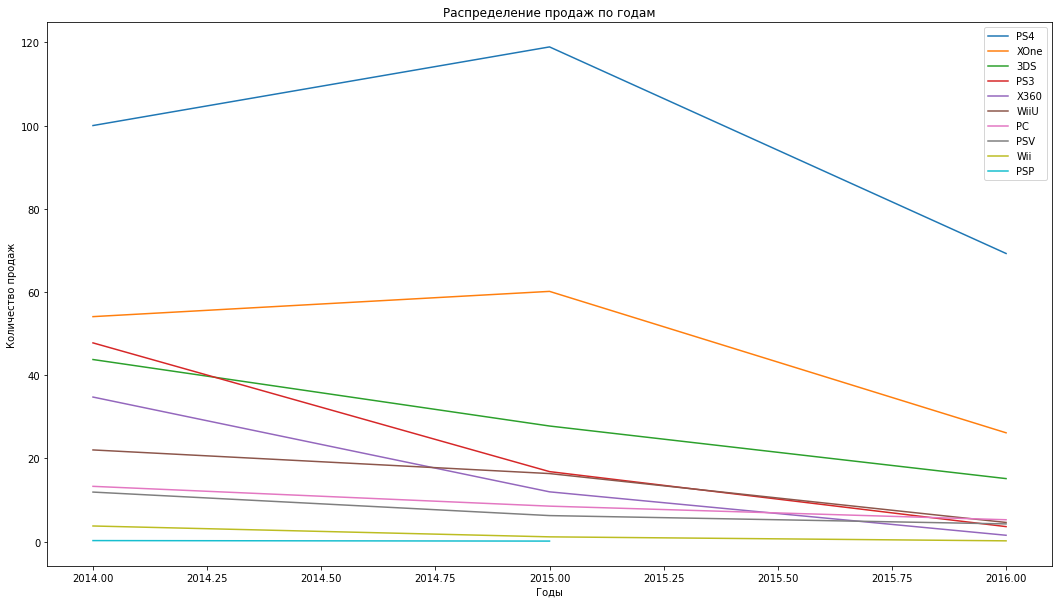

In [38]:
plt.figure(figsize=(18, 10))
plt.title('Распределение продаж по годам')
plt.xlabel('Годы')
plt.ylabel('Количество продаж')
for platform in platform_sales_2014['platform']:
    sns.lineplot(data=total_sales_by_year_2014(
        platform)['total_sales'], label=platform)
    plt.legend()

Исходя из графика линейного распределения видно, что в настоящее время лидируют такие платформы, как PS4 и xOne. Данные платформы можно брать как основу для дальнейших продаж компьютерных игр. Однако тенденция к падения спроса к 2016 году видна у всех платформ. Платформа PSP к 2015 году исчезла с продаж.

### Глобальные продажи игра в разбивке по платформам

Построим диаграммы размаха для определения медианных значений и квартилей по продажам игр на топовых платформах.

In [39]:
platform_sales_list = list(platform_sales_2014['platform'].loc[:4])

top_five_platform_df = df_2014.loc[(df_2014['platform']
                              .isin(platform_sales_list))]
top_five_platform_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16672,Metal Gear Solid V: The Definitive Experience,XOne,2016,Action,0.01,0.00,0.00,0.00,NaN,NaN,M,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16677,Aikatsu Stars! My Special Appeal,3DS,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


Text(0, 0.5, 'Количество продаж')

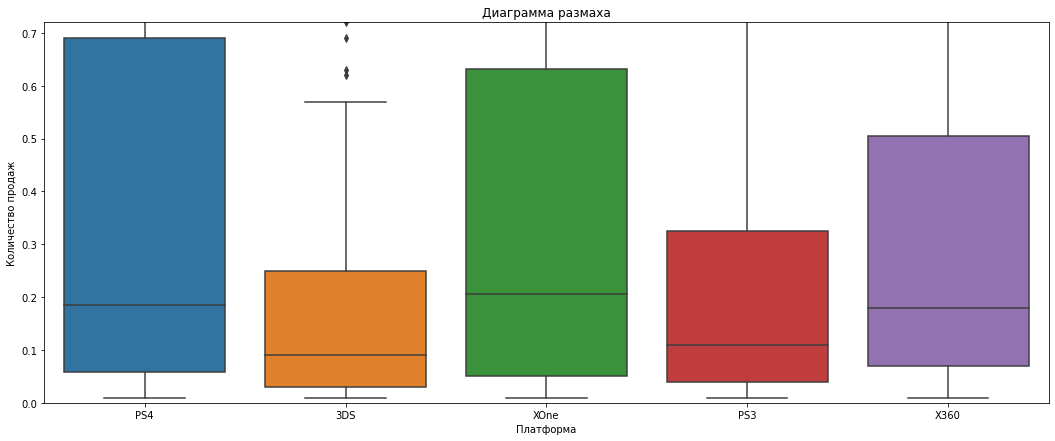

In [40]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=top_five_platform_df,
            x='platform',
            y='total_sales')

plt.ylim(0, 0.72)
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Text(0, 0.5, 'Количество продаж')

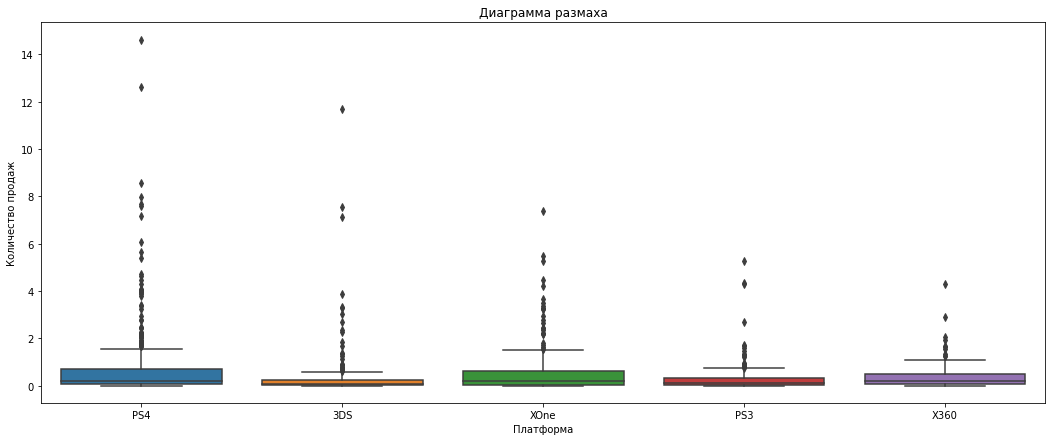

In [41]:
plt.figure(figsize=(18, 7))
sns.boxplot(data=top_five_platform_df,
            x='platform',
            y='total_sales')
plt.title('Диаграмма размаха')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Из диграм размаха видно, что медианные значения продаж игр находятся в районе 0,5 миллионов копий. Иногда игры "выстреливают" и продаются почти под 15 миллионов копий, но это редкость.

Проанализируем зависимость количества продаж по самой топовой за все время платформе - PlayStation 4, - в зависимости от оценки пользователей и критиков.

In [42]:
the_most_popular_platform = df_2014.loc[(df_2014['platform'] == 'PS4')]
the_most_popular_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.70,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.00,7.50,NaN,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.00,7.90,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.00,5.50,M,0.01


In [43]:
the_most_popular_platform['critic_score'].corr(the_most_popular_platform['total_sales'])

0.4026614106810409

Корреляция между оценкой критиков и количеством проданных копий умеренная.

Text(0, 0.5, 'Объем продаж')

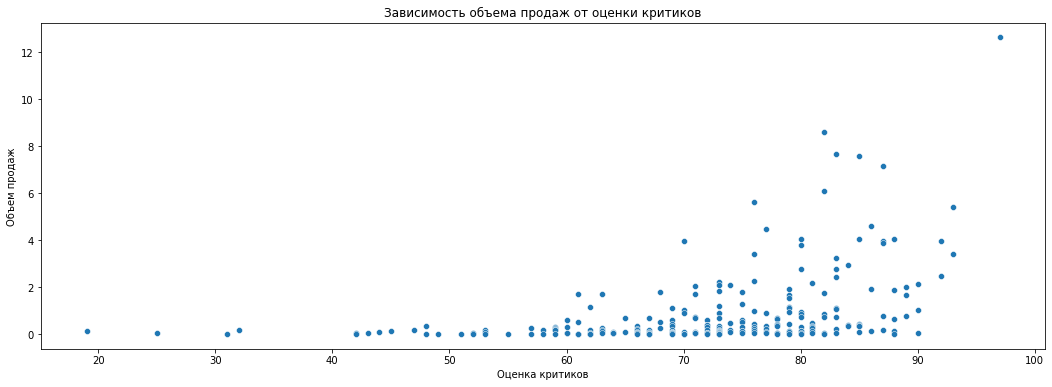

In [44]:
plt.figure(figsize=(18, 6))
sns.scatterplot(data=the_most_popular_platform,
                x='critic_score',
                y='total_sales')
plt.title('Зависимость объема продаж от оценки критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Объем продаж')

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с объемом примерно 1-4 млн. продаж.

Посмотрим на корреляцию между оценков пользователей и продажами копий игр.

In [45]:
the_most_popular_platform['user_score'].corr(the_most_popular_platform['total_sales'])

-0.04013158947269733

Взаимосвязь между данными показателями обратная и отсутствует.

Text(0, 0.5, 'Объем продаж')

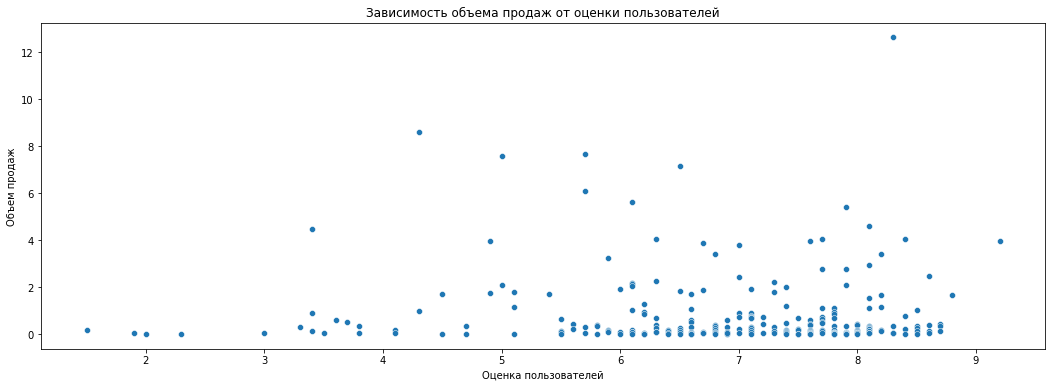

In [46]:
plt.figure(figsize=(18, 6))
sns.scatterplot(data=the_most_popular_platform,
                x='user_score',
                y='total_sales')
plt.title('Зависимость объема продаж от оценки пользователей')
plt.xlabel('Оценка пользователей')
plt.ylabel('Объем продаж')

Оценки пользователей корреляции с продажами не имеют.

Построем зависимости количества продаж от оценки критиков и пользователей по другим платформам.

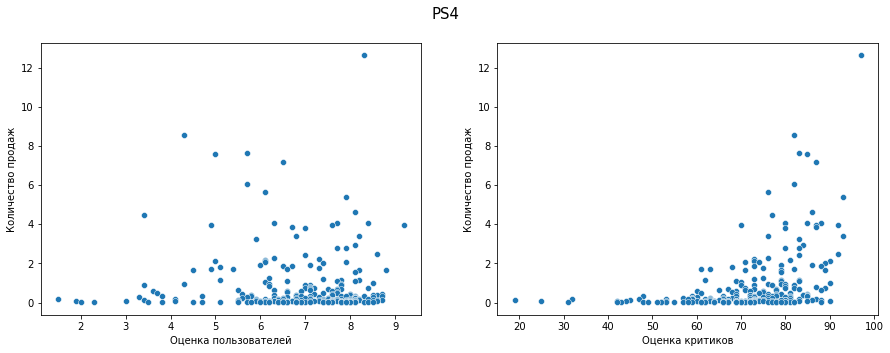

Корреляция между отзывами пользователей и продажами  PS4 : Отсутствует -0.04013158947269733
Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.4026614106810409


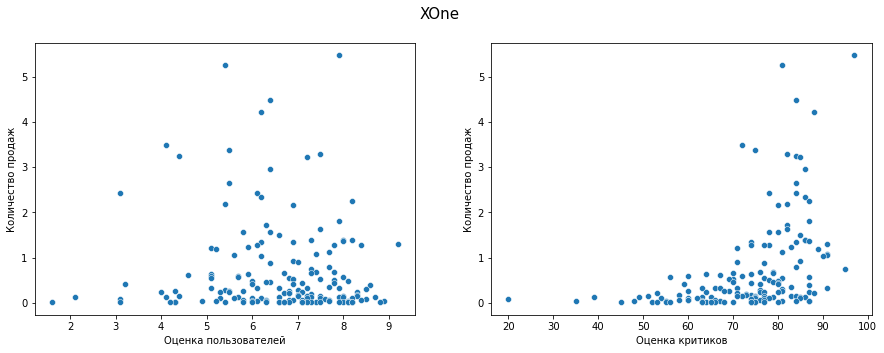

Корреляция между отзывами пользователей и продажами  XONE : Отсутствует -0.07038392806475809
Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.42867694370333187


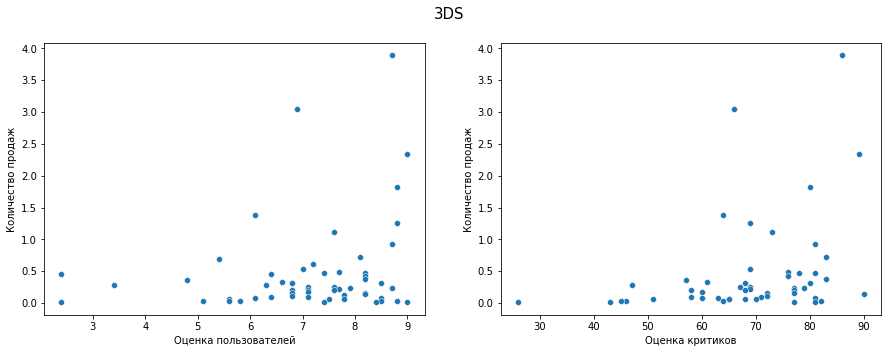

Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.2151932718527028
Корреляция между отзывами критиков и игровой платформой  3DS : Умеренная 0.314117492869051


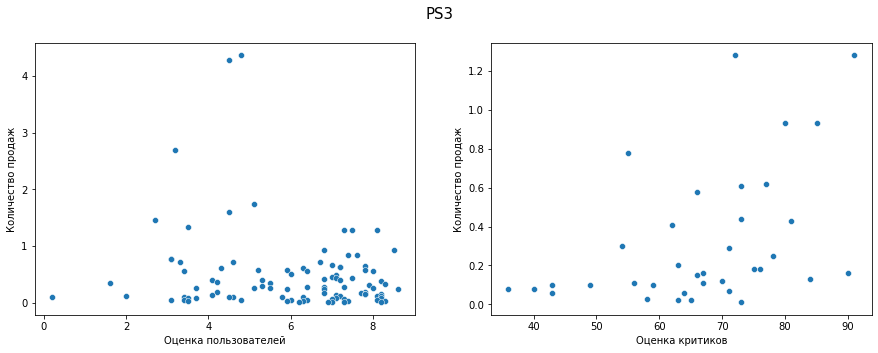

Корреляция между отзывами пользователей и продажами  PS3 : Отсутствует -0.16676141347662118
Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.44657460493190704


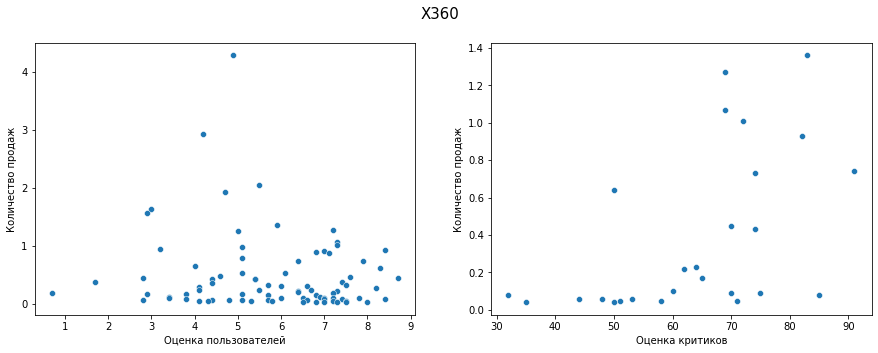

Корреляция между отзывами пользователей и продажами  X360 : Отсутствует -0.138444570945665
Корреляция между отзывами критиков и игровой платформой  X360 : Высокая 0.5257228356581523


In [47]:
'''Функция принимает наименование платформы, выбирает необходимые данные 
и строит scatterplots на основани выбранных данных.
'''

platform_sales_list = list(platform_sales_2014['platform'].loc[:4])
top_five_platform_df_all_sales = df_2014.loc[(df_2014['platform']
                                        .isin(platform_sales_list))]

try:
    def construction_of_correlation_dependencies(platform):
        platform_df = top_five_platform_df_all_sales.loc[
                top_five_platform_df_all_sales['platform'] == platform]
        fig, ax = plt.subplots(1, 2, figsize=(15, 5))
        sns.scatterplot(data=platform_df, x='user_score',
                        y='total_sales', ax=ax[0])
        sns.scatterplot(data=platform_df, x='critic_score',
                        y='total_sales', ax=ax[1])
        fig.suptitle(platform, fontsize=15)
        ax[0].set(xlabel='Оценка пользователей')
        ax[1].set(xlabel='Оценка критиков')
        ax[0].set(ylabel='Количество продаж')
        ax[1].set(ylabel='Количество продаж')
        plt.show()

        user_correl = platform_df['user_score'].corr(platform_df['total_sales'])
        critic_correl = platform_df['critic_score'].corr(platform_df['total_sales'])

        if 0.3 >= user_correl >= 0.1:
            print('Корреляция между отзывами пользователей и продажами ',
                  platform.upper(), ': Слабая', user_correl)
        elif 0.5 >= user_correl >= 0.3:
            print('Корреляция между отзывами пользователей и продажами ',
                  platform.upper(), ': Умеренная', user_correl)
        elif 0.7 >= user_correl >= 0.5:
            print('Корреляция между отзывами пользователей и продажами ',
                  platform.upper(), ': Высокая', user_correl)
        elif 0.9 >= user_correl >= 0.7:
            print('Корреляция между отзывами пользователей и продажами ',
                  platform.upper(), ': Весьма высокая', user_correl)
        elif 1 >= user_correl >= 0.9:
            print('Корреляция между отзывами пользователей и продажами ',
                  platform.upper(), ': Сильная', user_correl)
        else:
            print('Корреляция между отзывами пользователей и продажами ',
                  platform.upper(), ': Отсутствует', user_correl)

        if 0.3 >= critic_correl >= 0.1:
            print('Корреляция между отзывами критиков и игровой платформой ',
                  platform.upper(), ': Слабая', critic_correl)
        elif 0.5 >= critic_correl >= 0.3:
            print('Корреляция между отзывами критиков и игровой платформой ',
                  platform.upper(), ': Умеренная', critic_correl)
        elif 0.7 >= critic_correl >= 0.5:
            print('Корреляция между отзывами критиков и игровой платформой ',
                  platform.upper(), ': Высокая', critic_correl)
        elif 0.9 >= critic_correl >= 0.7:
            print('Корреляция между отзывами критиков и игровой платформой ',
                  platform.upper(), ': Весьма высокая', critic_correl)
        elif 1 >= critic_correl >= 0.9:
            print('Корреляция между отзывами критиков и игровой платформой ',
                  platform.upper(), ': Сильная', critic_correl)
        else:
            print('Корреляция между отзывами критиков и игровой платформой ',
                  platform.upper(), ': Отсутствует', critic_correl)
    for platform in platform_sales_list:
        construction_of_correlation_dependencies(platform)
except:
    print('Ошибка')

Как видно из графиков распределения ситуация аналогичная ситуации с PlayStation 4.

### Распределение игр по жанрам

Посмотрим на лидирующие жанры в мировой тенденции игромании.

In [48]:
genre_sales_df = (df_2014.pivot_table(index='genre', values='total_sales', aggfunc=np.median)
                         .sort_values(by='total_sales', ascending=False)
                         .reset_index())
genre_sales_df

,genre,total_sales
0,Shooter,0.52
1,Sports,0.18
2,Platform,0.14
3,Fighting,0.12
4,Role-Playing,0.11
5,Simulation,0.10
6,Action,0.09
7,Misc,0.09
8,Racing,0.09
9,Strategy,0.06


Лидирующую позицию занимают шутеры.

Text(0, 0.5, 'Объем продаж')

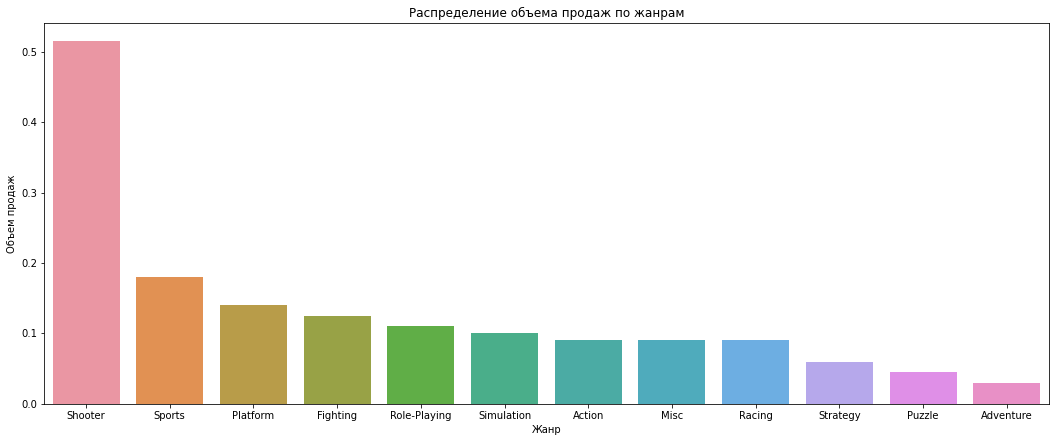

In [49]:
plt.figure(figsize=(18, 7))
sns.barplot(x=genre_sales_df['genre'], y=genre_sales_df['total_sales'])
plt.title('Распределение объема продаж по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Объем продаж')

### Вывод

Из проведенного анализа видно, что:
 * наиболее продаваемые в последние годы были платформы PS4, XOne, 3DS, PS3, X360;
 * среднее количество продаж по платформам составляет около 0.2 млн. копий;
 * корреляция по PS4 между отзывами критиков и объемами продаж умеренная, а между отзывами пользователей и объемами продаж отсутствует;
 * по остальным платформам корреляция схожая с PS4.
 * наиболее продаваемый жанр - шутеры.

## Портрет пользователей

Составим портрет пользователей в зависимости от региона:
 * NA_sales — продажи в Северной Америке (миллионы проданных копий).
 * EU_sales — продажи в Европе (миллионы проданных копий).
 * JP_sales — продажи в Японии (миллионы проданных копий).

**Портрет пользователей из Северной Америки**

Рассмотрим, какие платформы самые популярные в Северной Америке.

Text(0, 0.5, 'Количество продаж')

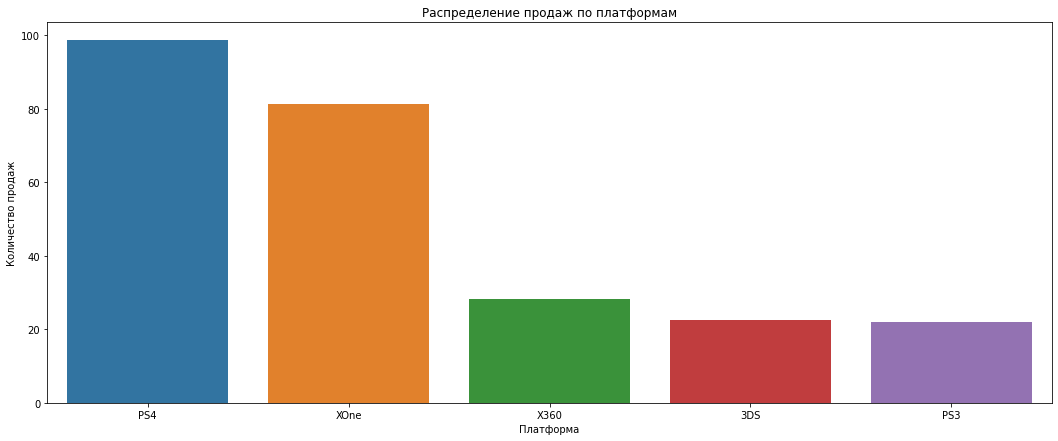

In [50]:
na_sales = (df_2014.pivot_table(index='platform',
                                values='na_sales',
                                aggfunc=np.sum)
                   .sort_values(by='na_sales',
                                ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=na_sales, x='platform', y='na_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Из гистограммы видно, что самыми популярными платформами в Америке являются PS4 и XOne.

Посмотрим на информацию в части, касающейся предпочтения по жанрам.

Text(0, 0.5, 'Количество продаж')

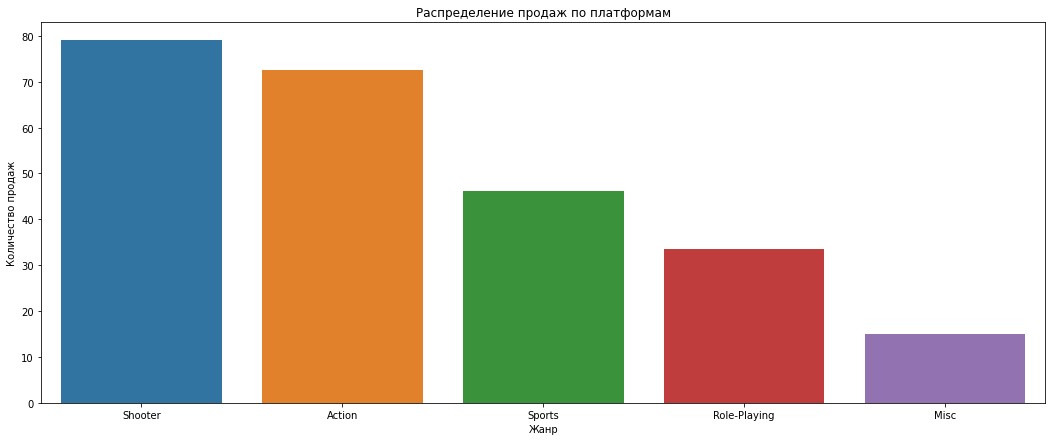

In [51]:
na_genre = (df_2014.pivot_table(index='genre', values='na_sales', aggfunc=np.sum)
                   .sort_values(by='na_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=na_genre, x='genre', y='na_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

Самыми популярными жанрами в Америке являются *Shooters* и *Actions*.

Посмотрим как на продажи игр влияюет рейтинг *Entertainment Software Rating Board*.

In [52]:
print('Количество пропусков в колонке рейтинг: ', df_2014['rating'].isna().sum())
print('Количество строк в датасете до заполнения: ', df_2014['rating'].shape)

rating_with_plag = df_2014.copy()

rating_with_plag['rating'] = rating_with_plag['rating'].fillna('Без рейтинга')

print('Количество строк в датасете после заполнения: ', df_2014['rating'].shape)

print('Количество значений "Без рейтинга":',
      rating_with_plag.loc[rating_with_plag['rating'] == 'Без рейтинга']['rating']
                      .count(), 'колонок.')

Количество пропусков в колонке рейтинг:  749
Количество строк в датасете до заполнения:  (1689,)
Количество строк в датасете после заполнения:  (1689,)
Количество значений "Без рейтинга": 749 колонок.


Замена NAN значений на заглушку "Без рейтинга" прошла успешно.

Text(0, 0.5, 'Количество продаж')

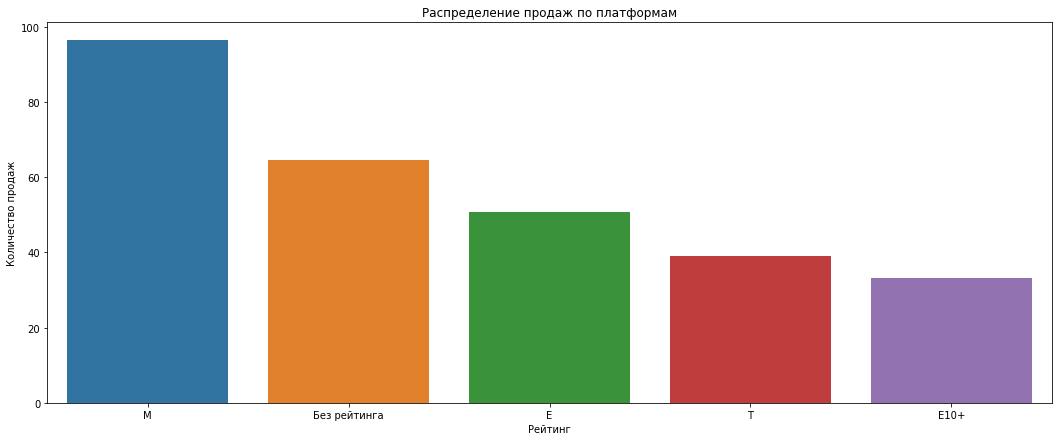

In [53]:
na_rating = (rating_with_plag.pivot_table(index='rating',
                                          values='na_sales',
                                          aggfunc=np.sum)
                             .sort_values(by='na_sales', ascending=False)
                             .reset_index()
            )

plt.figure(figsize=(18, 7))
sns.barplot(data=na_rating, x='rating', y='na_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

Рейтенг Entertainment Software Rating Board под категорией M (для взрослых) имеет наибольшие продажи.

**Портрет пользователей из Европы**

Рассмотрим, какие платформы самые популярные в Европе.

Text(0, 0.5, 'Количество продаж')

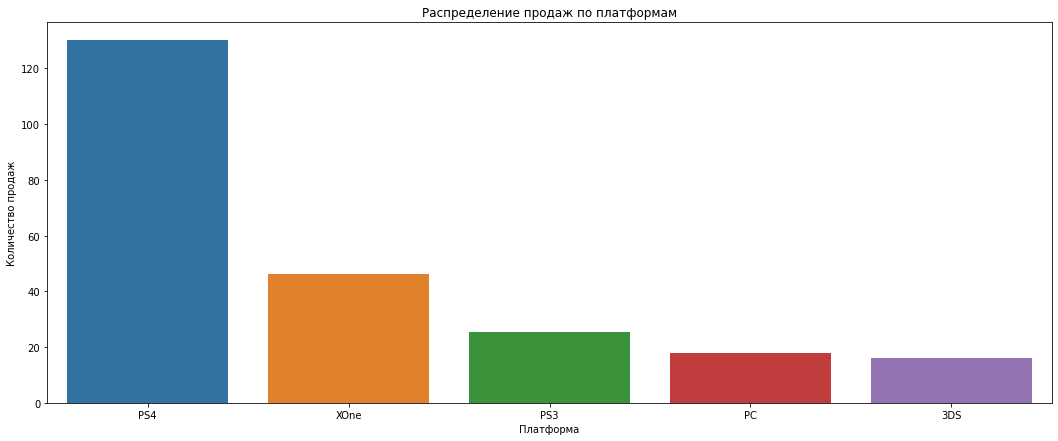

In [54]:
eu_sales = (df_2014.pivot_table(index='platform', values='eu_sales', aggfunc=np.sum)
                   .sort_values(by='eu_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
           )

plt.figure(figsize=(18, 7))
sns.barplot(data=eu_sales, x='platform', y='eu_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Из гистограммы видно, что самыми популярными платформами в Европе являются PS4 и XOne.

Посмотрим на информацию в части, касающейся предпочтения по жанрам.

Text(0, 0.5, 'Количество продаж')

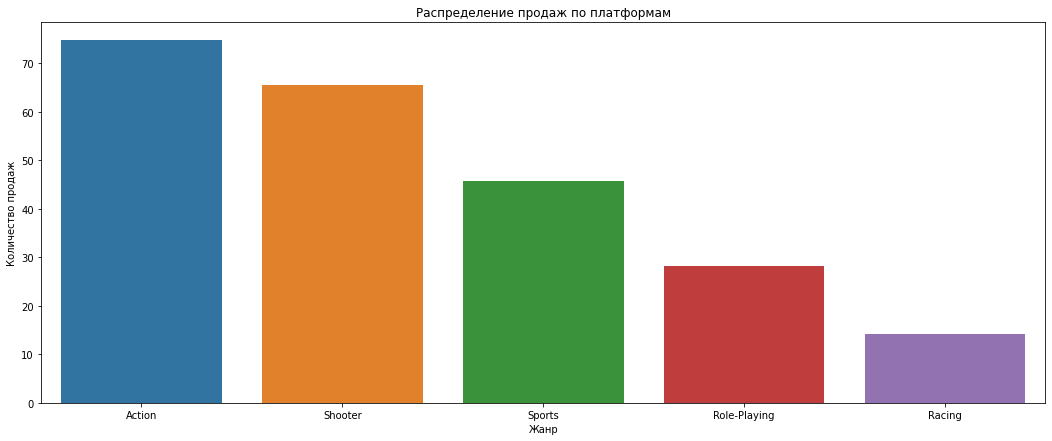

In [55]:
eu_genre = (df_2014.pivot_table(index='genre', values='eu_sales', aggfunc=np.sum)
                   .sort_values(by='eu_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
            )

plt.figure(figsize=(18, 7))
sns.barplot(data=eu_genre, x='genre', y='eu_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

Самыми популярными жанрами в Европе, как и в Америке являются *Action* и *Shooter*.

Посмотрим как на продажи игр влияюет рейтинг *Entertainment Software Rating Board*.

Text(0, 0.5, 'Количество продаж')

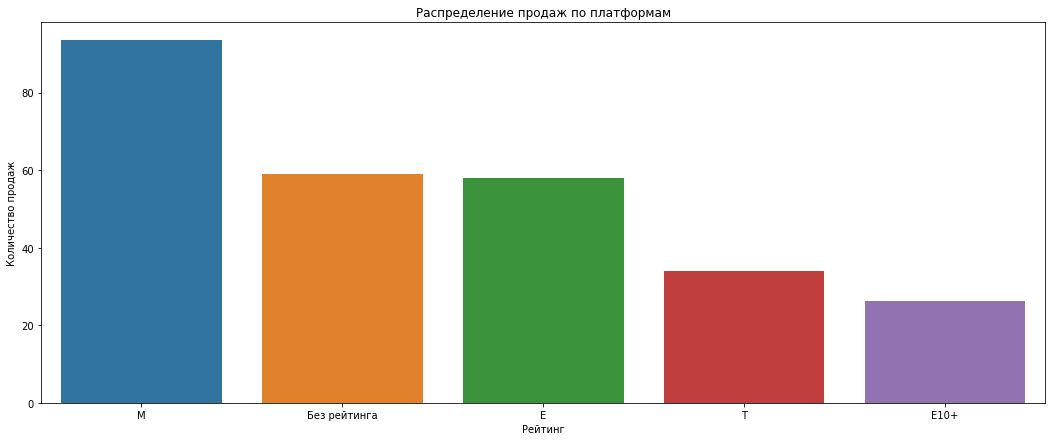

In [56]:
eu_rating = (rating_with_plag.pivot_table(index='rating',
                                          values='eu_sales',
                                          aggfunc=np.sum)
                             .sort_values(by='eu_sales',
                                          ascending=False)
                             .reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=eu_rating, x='rating', y='eu_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

Рейтенг Entertainment Software Rating Board под категорией M (для взрослых) имеет наибольшие продажи.

**Портрет пользователей из Японии**

Рассмотрим, какие платформы самые популярные в Японии.

Text(0, 0.5, 'Количество продаж')

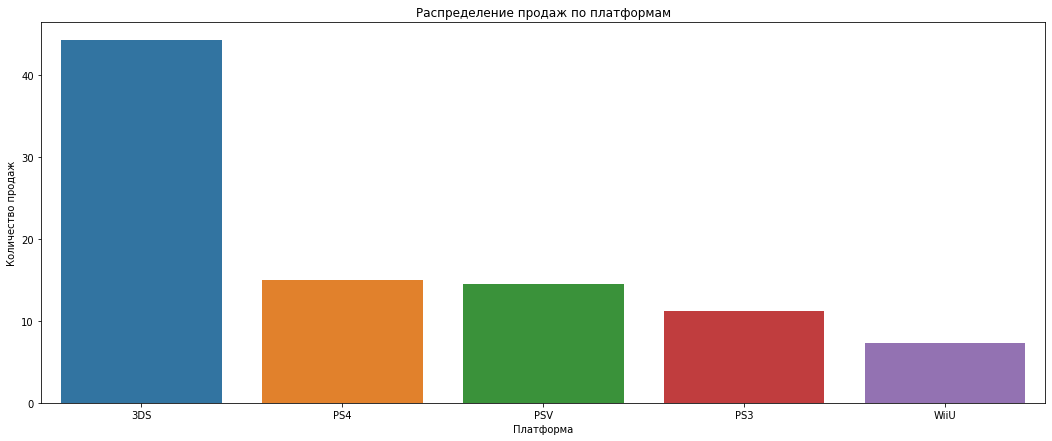

In [57]:
jp_sales = (df_2014.pivot_table(index='platform', values='jp_sales', aggfunc=np.sum)
                   .sort_values(by='jp_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
            )

plt.figure(figsize=(18, 7))
sns.barplot(data=jp_sales, x='platform', y='jp_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество продаж')

Из гистограммы видно, что самыми популярными платформами в Америке являются 3DS и PS4.

Посмотрим на информацию в части, касающейся предпочтения по жанрам.

Text(0, 0.5, 'Количество продаж')

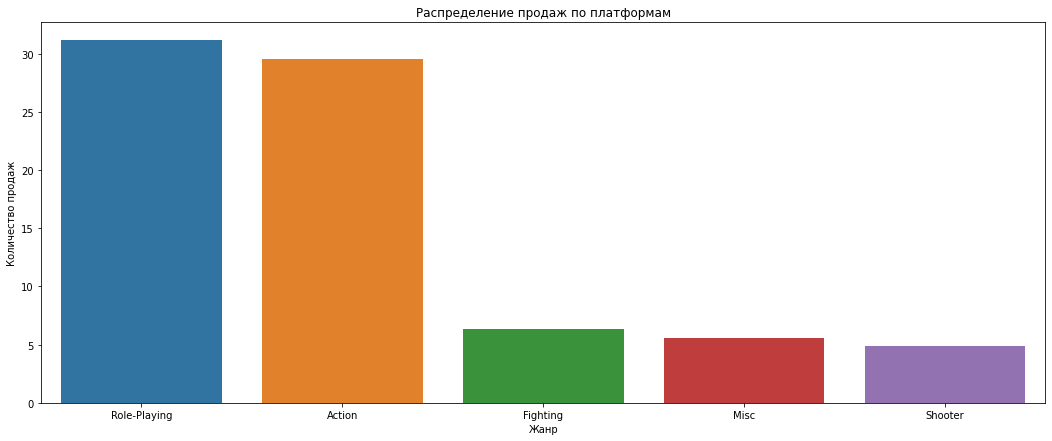

In [58]:
jp_genre = (df_2014.pivot_table(index='genre', values='jp_sales', aggfunc=np.sum)
                   .sort_values(by='jp_sales', ascending=False)
                   .reset_index()
                   .loc[0:4]
            )

plt.figure(figsize=(18, 7))
sns.barplot(data=jp_genre, x='genre', y='jp_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Жанр')
plt.ylabel('Количество продаж')

Самыми популярными жанрами в Америке являются *Role_Playing* и *Action*.

Посмотрим как на продажи игр влияюет рейтинг *Entertainment Software Rating Board*.

Text(0, 0.5, 'Количество продаж')

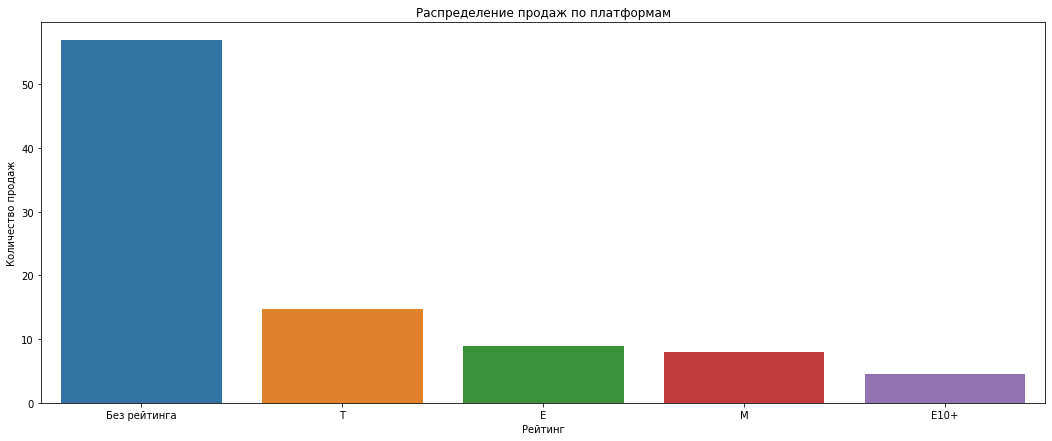

In [59]:
jp_rating = (rating_with_plag.pivot_table(index='rating',
                                          values='jp_sales',
                                          aggfunc=np.sum)
                             .sort_values(by='jp_sales', ascending=False)
                             .reset_index())

plt.figure(figsize=(18, 7))
sns.barplot(data=jp_rating, x='rating', y='jp_sales')
plt.title('Распределение продаж по платформам')
plt.xlabel('Рейтинг')
plt.ylabel('Количество продаж')

Игры под категорией "Без рейтинга" имеют наибольшие продажи.

### Вывод

Из анализа портрета пользователей видно, что в разных частях света люди играют в разные платформы и разные жанры игр.

В Северной Америке больше играют в PS4 и XOne, жанр shooters или actions.

В Европе больше играют в PS4 и XOne, жанров больше actions, поменьше shooters.

В Японии больше играют в XDS и PS4, жанров больше Role-Playing, поменьше actions.

## Проверка гипотез

### Первая гипотеза

Сформулируем первые нулевую и альтернативную гипотезы.

H0 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

H1 - Средние пользовательские рейтинги платформ Xbox One и PC разные.

Произведем проверку гипотез.

In [60]:
# Проверка первой гипотезы
xone_selection = df_2014.loc[(df_2014['platform'] == 'XOne')]['user_score']
pc_selection = df_2014.loc[(df_2014['platform'] == 'PC')]['user_score']

alpha = .05

results = st.ttest_ind(xone_selection.dropna(),
                       pc_selection.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги с платформ неодинаковы, с вероятностью в 12% такое или большее различие можно получить случайно. Поэтому нелувую гипотезу мы не отвергаем.

### Вторая гипотеза

Сформулируем первые нулевую и альтернативную гипотезы.

H0 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1 - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Произведем проверку гипотез.

In [61]:
# Проверка второй гипотезы
action_selection = df_2014.loc[(df_2014['genre'] == 'Action')]['user_score']
sports_selection = df_2014.loc[(df_2014['genre'] == 'Sports')]['user_score']

alpha = .05

results = st.ttest_ind(action_selection.dropna(),
                       sports_selection.dropna(), equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги с платформ неодинаковы, с вероятностью в 1.1825550382644557e-14% такое или большее различие можно получить случайно. Поэтому нелувую гипотезу мы отвергаем.

### Вывод

Мы проверили две гипотезы. Из их проверки можно сделать следующие выводы:
1. Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги с платформ неодинаковы, с вероятностью в 12% такое или большее различие можно получить случайно. Поэтому нелувую гипотезу мы не отвергаем.
2. Полученное значение p-value говорит о том, что хотя средние пользовательские рейтинги с платформ неодинаковы, с вероятностью в 1.1825550382644557e-14% такое или большее различие можно получить случайно. Поэтому нелувую гипотезу мы отвергаем.

## Общий вывод

Исходя из проведенного анализа, для составления рекламного плана продаж компьютерных игр на следующий год можно сделать следующие выводы:
 * Как правило при продаже игра надо ориентировать на относительно "новые" платформы, которые выпускались не так давно и которые еще только набирают оборот. О "старичках" можно забыть, т.к. уровень продаж по ним неуклонно падает. Необходимо искать новые "загорающиеся звезды" на рынке игровых платформ, чтобы максимально попадать в тренд текущих дней и пополнять счет компании прибылью.
 * Общий тренд на рынке на 2016 год таков, что игровые платформы сильно проседают по продажам. Возможно на рынке появляется какая-то новая технология, которая переманивает к себе пользователей (к примеру AR, VR или мобильные игры). Стоит проанализировать рынок к этом направлении и скорректировать глобальную направленность компании.
 * На текущий момент времени и на грядущий год в части платформ нужно ориентироваться на популярные из них, такие как PS4 и XOne.
 * Необходимо учитывать, что в среднем игры даже по топовым платформам продаются примерно по 0.2 млн. копий. И только иногда отдельные игры на отдельных платформах "выстреливают".
 * Не стоит сильно акцентировать внимание на отзывах пользователей и критиков по различным платформам и из этого делать вывод о продаваемости игры внутри платформы - они имеют слабую корреляцию.
 * В части жанров лучше всего ориентироваться на жанры Shooter, Action и Role-Playing - это самые продаваемые жанры в зависимости от региона.